In [1]:
!pip install google-cloud-storage tensorflow --quiet

In [22]:
import os
import json
from datetime import datetime as dt
from multiprocessing import Pool

import numpy as np

import itertools
import matplotlib.pyplot as plt


from sklearn.utils import shuffle
from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelBinarizer
from skimage.io import imread

from google.cloud import storage

import tensorflow as tf
from tensorflow.keras.applications import vgg16
from tensorflow.python.lib.io import file_io

import _pickle as pickle

In [7]:
basepath = 'gs://bigdata-allanbatista-com-br/image-classifier/20181118_130733/'

In [29]:
with file_io.FileIO('{}binarizer.pickle'.format(basepath), 'rb') as f:
    binarizer = pickle.loads(f.read())

In [50]:
y_test = shuffle(binarizer.classes_).tolist() + shuffle(binarizer.classes_).tolist() + binarizer.classes_.tolist()
y_pred = shuffle(binarizer.classes_).tolist() + shuffle(binarizer.classes_).tolist() + binarizer.classes_.tolist()

In [51]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

   bluebell       0.33      0.33      0.33         3
  buttercup       0.33      0.33      0.33         3
  coltsfoot       0.33      0.33      0.33         3
    cowslip       0.33      0.33      0.33         3
     crocus       0.67      0.67      0.67         3
   daffodil       0.33      0.33      0.33         3
      daisy       0.33      0.33      0.33         3
  dandelion       0.33      0.33      0.33         3
 fritillary       0.33      0.33      0.33         3
       iris       0.33      0.33      0.33         3
lily_valley       0.33      0.33      0.33         3
      pansy       0.33      0.33      0.33         3
   snowdrop       0.33      0.33      0.33         3
  sunflower       0.33      0.33      0.33         3
  tigerlily       0.33      0.33      0.33         3
      tulip       0.33      0.33      0.33         3
 windflower       0.33      0.33      0.33         3

avg / total       0.35      0.35      0.35  

Normalized confusion matrix
[[ 0.33  0.67  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.  ]
 [ 0.    0.33  0.    0.    0.    0.33  0.    0.    0.33  0.    0.    0.    0.
   0.    0.    0.    0.  ]
 [ 0.    0.    0.33  0.    0.33  0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.33]
 [ 0.    0.    0.33  0.33  0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.33  0.    0.    0.  ]
 [ 0.    0.    0.    0.33  0.67  0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.  ]
 [ 0.33  0.    0.    0.    0.    0.33  0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.33  0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.33  0.    0.    0.    0.33  0.
   0.33  0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.33  0.    0.    0.    0.    0.
   0.33  0.33  0.    0.  ]
 [ 0.33  0.    0.    0.    0.    0.    0.    0.33  0.33  0.    0.    0.    0.
   0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    

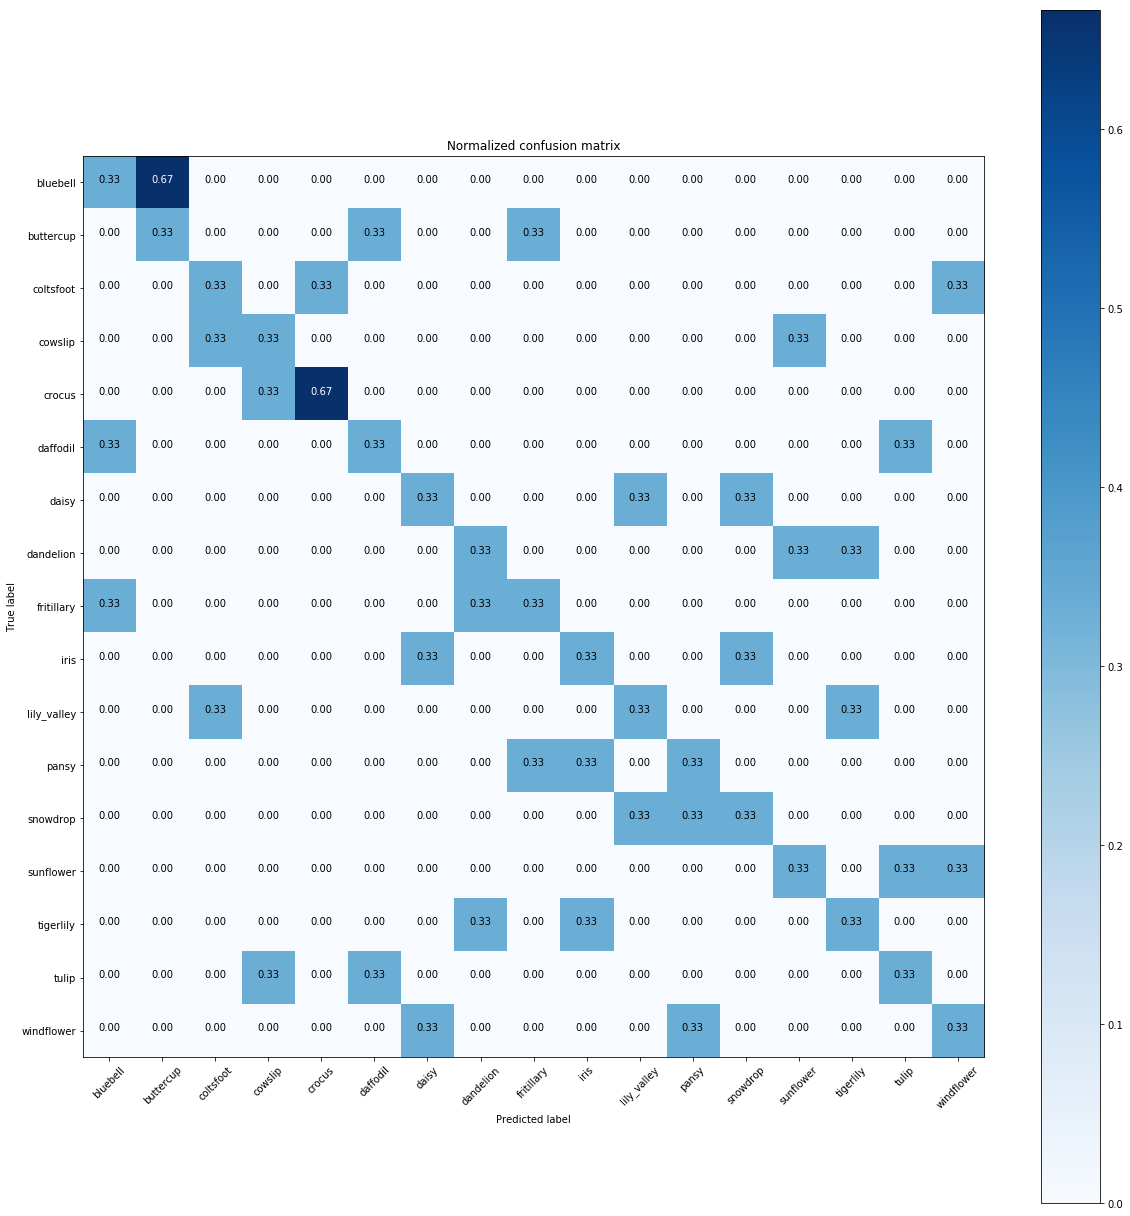

In [53]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot normalized confusion matrix
plt.figure(figsize=(len(binarizer.classes_), len(binarizer.classes_)))
plot_confusion_matrix(cnf_matrix, classes=binarizer.classes_, normalize=True,
                      title='Normalized confusion matrix')

plt.show()